In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

plt.style.use('ggplot')
%matplotlib inline

In [2]:
msd_data = pd.read_excel('MSD_Features.xls')

In [3]:
msd_data

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.6760,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.2030,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.5530,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.2860,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.1850,100.315,189560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,David Arkenstone,Return Of The Guardians,The Forgotten Lands,1996,TRBIJIA128F425F57D,7xV2k7FEMtUT4IUu4L87it,0.562,0.525,9,-14.594,1,0.0283,0.456000,0.883000,0.3110,0.7130,141.957,314533
5599,Moonspell,Sin / Pecado,The Hanged Man,1998,TRBIJMU12903CF892B,3e0tyTV5FiV1bcYeRjdDz2,0.404,0.636,4,-8.798,0,0.0325,0.064300,0.653000,0.0795,0.0979,140.105,386333
5600,Seventh Day Slumber,Once Upon A Shattered Life,Shattered Life,2005,TRBIJYB128F14AE326,2CQwzG5nbS7ys8CHSlavVg,0.406,0.895,2,-5.282,0,0.0563,0.000429,0.000032,0.1200,0.2780,150.326,209693
5601,It Dies Today,Sirens,One the road (to Damnation),2006,TRBIJFB128F92ED124,0MS1NrmBWaCpPLFEXV0VMZ,0.329,0.963,4,-3.501,1,0.1450,0.000019,0.001380,0.2220,0.2050,116.847,179413


In [4]:
msd_data.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
           'danceability',           'energy',              'key',
               'loudness',             'mode',      'speechiness',
           'acousticness', 'instrumentalness',         'liveness',
                'valence',            'tempo',      'duration_ms'],
      dtype='object')

In [5]:
bb_data = pd.read_excel('BillBoard_Features.xls')

In [6]:
bb_data

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.2920,0.08520,0.000000,0.5340,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418,-5.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Me So Horny,The 2 Live Crew,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,1,0.0986,0.00336,0.000500,0.0833,0.949,132.737,260441,-11.157
9325,Pump Up The Jam,Technotronic Featuring Felly,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,0,0.1150,0.02390,0.000000,0.0491,0.675,124.810,215040,-7.375
9326,Got To Have Your Love,Mantronix Featuring Wondress,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,0,0.0753,0.17900,0.001070,0.0497,0.960,105.632,383333,-13.669
9327,All Nite,Entouch Featuring Keith Sweat,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,1,0.0453,0.04780,0.000051,0.1030,0.929,107.598,368467,-13.040


In [7]:
msd_data.isna().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [8]:
bb_data.isna().sum()

Track               1
Artist              2
SpotifyID           0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

In [9]:
msd_data['ID'] = msd_data[[4,5]].apply(lambda x: ' '.join(x),axis=1)
# Combining both columns of 4 and 5 to make a new column ID 

In [10]:
msd_data.drop(([4,5]),axis=1,inplace=True)
# Dropping those 2 as they are not needed anymore

In [11]:
msd_data = msd_data.rename({0:'Artist',1:'Album',2:'Track',3:'Year'},axis=1)
# Renaming the columns acc to basic sense

In [12]:
msd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            5603 non-null   object 
 1   Album             5603 non-null   object 
 2   Track             5603 non-null   object 
 3   Year              5603 non-null   int64  
 4   danceability      5603 non-null   float64
 5   energy            5603 non-null   float64
 6   key               5603 non-null   int64  
 7   loudness          5603 non-null   float64
 8   mode              5603 non-null   int64  
 9   speechiness       5603 non-null   float64
 10  acousticness      5603 non-null   float64
 11  instrumentalness  5603 non-null   float64
 12  liveness          5603 non-null   float64
 13  valence           5603 non-null   float64
 14  tempo             5603 non-null   float64
 15  duration_ms       5603 non-null   int64  
 16  ID                5603 non-null   object 


In [13]:
bb_data.rename(columns={'SpotifyID':'ID'},inplace=True)
bb_data
# changing the SpotifyID column name to ID so that it'll be easier to concat the two DFs

,Track,Artist,ID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.2920,0.08520,0.000000,0.5340,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418,-5.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Me So Horny,The 2 Live Crew,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,1,0.0986,0.00336,0.000500,0.0833,0.949,132.737,260441,-11.157
9325,Pump Up The Jam,Technotronic Featuring Felly,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,0,0.1150,0.02390,0.000000,0.0491,0.675,124.810,215040,-7.375
9326,Got To Have Your Love,Mantronix Featuring Wondress,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,0,0.0753,0.17900,0.001070,0.0497,0.960,105.632,383333,-13.669
9327,All Nite,Entouch Featuring Keith Sweat,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,1,0.0453,0.04780,0.000051,0.1030,0.929,107.598,368467,-13.040


In [14]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   ID                9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


In [15]:
msd_bb = pd.concat([msd_data,bb_data],axis=0,ignore_index=True)

In [16]:
msd_bb

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ID
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016.0,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,TRAAADZ128F9348C2E 5JeyXbf7CrVQ8DqwFikN0P
1,JennyAnyKind,I Need You,Young Boy Blues,2000.0,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,TRAAAVO128F93133D4 5uN6oY2NGLC6GKoywHKkZA
2,Casual,Fear Itself,I Didn't Mean To,1994.0,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,TRAAAAW128F429D538 01TR6aAKrA2cI3Z0gnCOsu
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006.0,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,TRAAAMO128F1481E7F 7ERvcsBBYzSHqQQqlI9xAN
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003.0,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,TRAAAPK128E0786D96 6dfppQDZQ4x3fCs6N89kV3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,The 2 Live Crew,NaN,Me So Horny,NaN,0.893,0.523,1,-11.157,1,0.0986,0.003360,0.000500,0.0833,0.949,132.737,260441,6rQ9ypCfSRZs2AqqobvXu3
14928,Technotronic Featuring Felly,NaN,Pump Up The Jam,NaN,0.867,0.911,10,-7.375,0,0.1150,0.023900,0.000000,0.0491,0.675,124.810,215040,0UAEHlFR79k9CJvknSGUNf
14929,Mantronix Featuring Wondress,NaN,Got To Have Your Love,NaN,0.763,0.505,10,-13.669,0,0.0753,0.179000,0.001070,0.0497,0.960,105.632,383333,7MZzwdBfX8Dq0xFLFfxtdJ
14930,Entouch Featuring Keith Sweat,NaN,All Nite,NaN,0.834,0.485,11,-13.040,1,0.0453,0.047800,0.000051,0.1030,0.929,107.598,368467,6q989QMsV87X9Em9J6DONi


In [17]:
msd_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14932 entries, 0 to 14931
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            14930 non-null  object 
 1   Album             5603 non-null   object 
 2   Track             14931 non-null  object 
 3   Year              5603 non-null   float64
 4   danceability      14932 non-null  float64
 5   energy            14932 non-null  float64
 6   key               14932 non-null  int64  
 7   loudness          14932 non-null  float64
 8   mode              14932 non-null  int64  
 9   speechiness       14932 non-null  float64
 10  acousticness      14932 non-null  float64
 11  instrumentalness  14932 non-null  float64
 12  liveness          14932 non-null  float64
 13  valence           14932 non-null  float64
 14  tempo             14932 non-null  float64
 15  duration_ms       14932 non-null  int64  
 16  ID                14932 non-null  object

In [18]:
msd_bb.isna().sum()

Artist                 2
Album               9329
Track                  1
Year                9329
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
ID                     0
dtype: int64

In [19]:
msd_bb=msd_bb.drop(['Album','Year'],axis=1)

In [20]:
msd_bb['mode'].unique()
# We have this value of -999 that makes no sense in this column

array([   1,    0, -999], dtype=int64)

In [21]:
msd_bb.replace(-999,np.nan,inplace=True)

In [22]:
msd_bb['mode'].unique()

array([ 1.,  0., nan])

In [23]:
msd_bb.isna().sum()

Artist               2
Track                1
danceability        10
energy              10
key                 10
loudness            10
mode                10
speechiness         10
acousticness        10
instrumentalness    10
liveness            10
valence             10
tempo               10
duration_ms         10
ID                   0
dtype: int64

In [24]:
msd_bb['danceability'].nunique()

917

In [25]:
msd_bb.dropna(inplace=True)

In [26]:
msd_bb.isna().sum()

Artist              0
Track               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
ID                  0
dtype: int64

In [27]:
msd_bb.shape

(14920, 15)

In [28]:
msd_bb=msd_bb.drop(['Track','Artist','ID'],axis=1)

In [29]:
msd_bb

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.699,0.519,8.0,-6.422,1.0,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027.0
1,0.458,0.570,5.0,-9.159,0.0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907.0
2,0.751,0.549,6.0,-10.508,0.0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933.0
3,0.456,0.472,5.0,-8.328,1.0,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640.0
4,0.498,0.300,7.0,-10.716,1.0,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14927,0.893,0.523,1.0,-11.157,1.0,0.0986,0.003360,0.000500,0.0833,0.949,132.737,260441.0
14928,0.867,0.911,10.0,-7.375,0.0,0.1150,0.023900,0.000000,0.0491,0.675,124.810,215040.0
14929,0.763,0.505,10.0,-13.669,0.0,0.0753,0.179000,0.001070,0.0497,0.960,105.632,383333.0
14930,0.834,0.485,11.0,-13.040,1.0,0.0453,0.047800,0.000051,0.1030,0.929,107.598,368467.0


In [30]:
msd_bb = msd_bb.drop_duplicates()

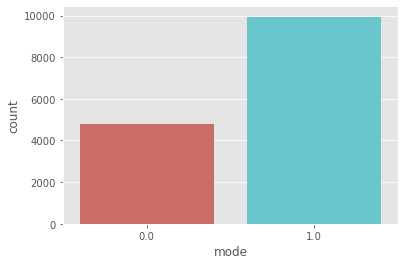

In [31]:
sns.countplot(x='mode', data=msd_bb,palette='hls')
plt.show()
# data is imbalanced, will have to sample it. But will only do it after train test split

In [32]:
x_features = list(msd_bb.columns)

In [33]:
x_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [34]:
x_features.remove('mode')


In [35]:
encoded_data = pd.get_dummies(msd_bb[x_features],drop_first=True)

In [36]:
encoded_data

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.699,0.519,8.0,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027.0
1,0.458,0.570,5.0,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907.0
2,0.751,0.549,6.0,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933.0
3,0.456,0.472,5.0,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640.0
4,0.498,0.300,7.0,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560.0
...,...,...,...,...,...,...,...,...,...,...,...
14927,0.893,0.523,1.0,-11.157,0.0986,0.003360,0.000500,0.0833,0.949,132.737,260441.0
14928,0.867,0.911,10.0,-7.375,0.1150,0.023900,0.000000,0.0491,0.675,124.810,215040.0
14929,0.763,0.505,10.0,-13.669,0.0753,0.179000,0.001070,0.0497,0.960,105.632,383333.0
14930,0.834,0.485,11.0,-13.040,0.0453,0.047800,0.000051,0.1030,0.929,107.598,368467.0


In [37]:
y = msd_bb['mode']
x = encoded_data

In [38]:
msd_bb['mode'].shape

(14743,)

In [39]:
encoded_data.shape

(14743, 11)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = LogisticRegression(max_iter=2000)

In [44]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [45]:
y_pred = log_reg.predict(x_test)

In [46]:
from sklearn import metrics

In [47]:
metrics.accuracy_score(y_test,y_pred)

0.6846388606307223

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       930
         1.0       0.68      1.00      0.81      2019

    accuracy                           0.68      2949
   macro avg       0.34      0.50      0.41      2949
weighted avg       0.47      0.68      0.56      2949



C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


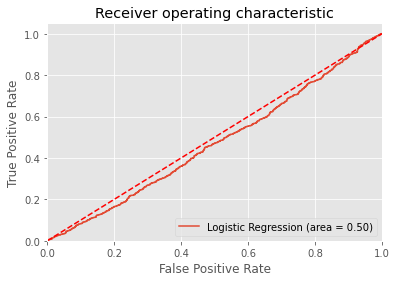

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [51]:
#upsampling using SMOTE

sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [52]:
log_reg_sm = LogisticRegression(max_iter=5000)

In [53]:
log_reg_sm.fit(x_train_sm,y_train_sm)

LogisticRegression(max_iter=5000)

In [54]:
print(metrics.classification_report(y_test,log_reg_sm.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.35      0.54      0.42       930
         1.0       0.72      0.53      0.61      2019

    accuracy                           0.54      2949
   macro avg       0.53      0.54      0.52      2949
weighted avg       0.60      0.54      0.55      2949



In [55]:
metrics.accuracy_score(y_test,log_reg_sm.predict(x_test))

0.5350966429298067

# GDA

In [56]:
pca = PCA(n_components=2)
pca.fit(x_train)
X_train = pca.transform(x_train)
X_test = pca.transform(x_test)

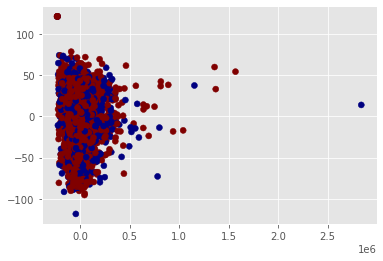

In [57]:
plt.scatter(X_train.T[0], X_train.T[1], c=y_train, cmap='jet');

In [58]:
phi = np.mean(y_train == 1)

In [59]:
indices = (y_train == 0)
denominator = np.sum(indices)
numerator = np.sum(X_train[indices], axis=0)
mu_0 = numerator / denominator

In [60]:
indices = (y_train == 1)
denominator = np.sum(indices)
numerator = np.sum(X_train[indices], axis=0)
mu_1 = numerator / denominator

In [61]:
mu = [mu_0, mu_1]
 
# Initialize the sum
x_minus_mu = X_train[0] - mu[y_train[0]]
# We don't want rank-one arrays
x_minus_mu = x_minus_mu.reshape(*(x_minus_mu.shape), 1)
s = np.matmul(x_minus_mu, x_minus_mu.T)
 
m = len(y_train)
 
for i in range(1, m):
    x_minus_mu = X_train[i] - mu[y_train[i]]
    x_minus_mu = x_minus_mu.reshape(*(x_minus_mu.shape), 1)
    s += np.matmul(x_minus_mu, x_minus_mu.T)
s/= m

TypeError: list indices must be integers or slices, not numpy.float64

In [ ]:
pi = 3.1415926535
n = len(mu_0) # Or mu_1, or any of the X
denominator = (2 * pi) ** (n / 2) * np.sqrt(np.linalg.det(s))
 
predictions = []
 
for x in X_test:
    x_minus_mu0 = x - mu_0
    x_minus_mu0 = x_minus_mu0.reshape(*(x_minus_mu0.shape), 1)
    p_x0 = 1 / denominator * np.exp(-0.5 * np.matmul(x_minus_mu0.T, np.matmul(np.linalg.inv(s), x_minus_mu0)))
    p_x0 = np.squeeze(p_x0)
 
    x_minus_mu1 = x - mu_1
    x_minus_mu1 = x_minus_mu1.reshape(*(x_minus_mu1.shape), 1)
    p_x1 = 1 / denominator * np.exp(-0.5 * np.matmul(x_minus_mu1.T, np.matmul(np.linalg.inv(s), x_minus_mu1)))
    p_x1 = np.squeeze(p_x1)
 
    if p_x1 >= p_x0:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

In [ ]:
print(accuracy_score(y_test, predictions))